In [9]:
import os
import pandas as pd

def load_pings():
    df = pd.DataFrame(columns=['time','source', 'dest', 'N', 'topo'])

    files = [f for f in os.listdir('./') if f.endswith('.txt')]
    for file in files:
        pc1, pc2, N, topo, _ = file.replace('.', '-').split('-')
        df2 = pd.read_csv(file, header=None)
        df2['source'] = pc1[2:]
        df2['dest'] = pc2[2:]
        df2['N'] = int(N)
        df2['topo'] = topo
        df2.columns = ['time', 'source','dest', 'N', 'topo']
        df2['time'] = df2['time'].apply(lambda x: x.split('time=')[1])
        df2['time'] = pd.to_timedelta(df2['time'])
        df2['time'] = df2['time'].apply(lambda x : x.microseconds)
        df2['time'] = df2['time'].apply(int)
        df = df.append(df2)
    return df

In [10]:
df = load_pings()

In [11]:
df

,time,source,dest,N,topo
0,52,1,0,100,star
1,156,1,0,100,star
2,43,1,0,100,star
3,70,1,0,100,star
4,51,1,0,100,star
...,...,...,...,...,...
5,209,1,12,100,chain
6,132,1,12,100,chain
7,148,1,12,100,chain
8,105,1,12,100,chain


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


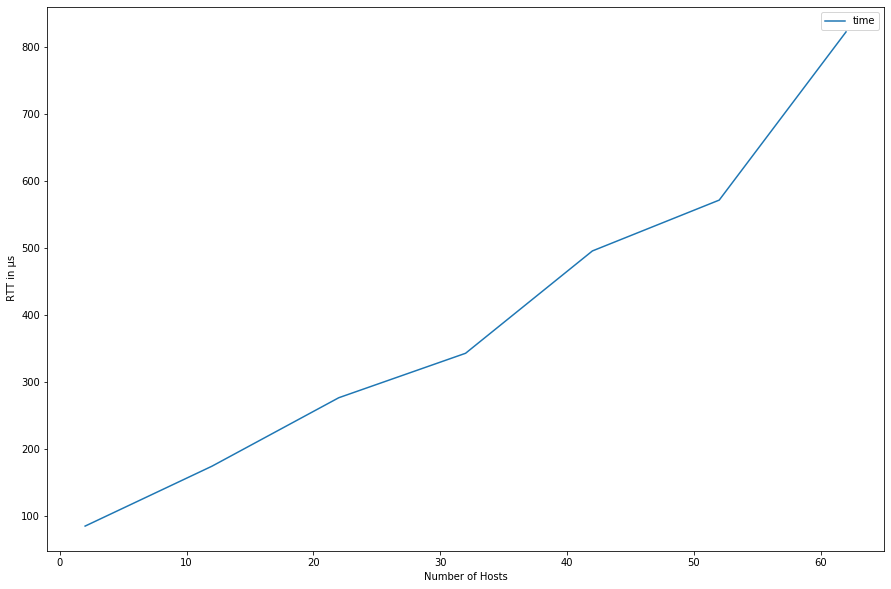

In [7]:
chain = df.loc[df["topo"] == "chain"]
chain["time"] = chain["time"].apply(int)
chain["dest"] = chain["dest"].apply(int)
chain100 = chain.loc[chain["N"] == 100]
wiw = chain100[["time","dest"]].groupby("dest").mean()
wiw.plot.line(ylabel=" RTT in µs", xlabel="Number of Hosts", figsize=(15,10))

In [19]:
star = df.loc[df["topo"] == "star"]
star["time"] = star["time"].apply(int)
star["dest"] = star["dest"].apply(int)
star0 = star.loc[star["dest"] == 0]
star2 = star.loc[star["dest"] == 2]

star0_wiw = star0[["time","N"]].groupby("N").mean()
star2_wiw = star2[["time","N"]].groupby("N").mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


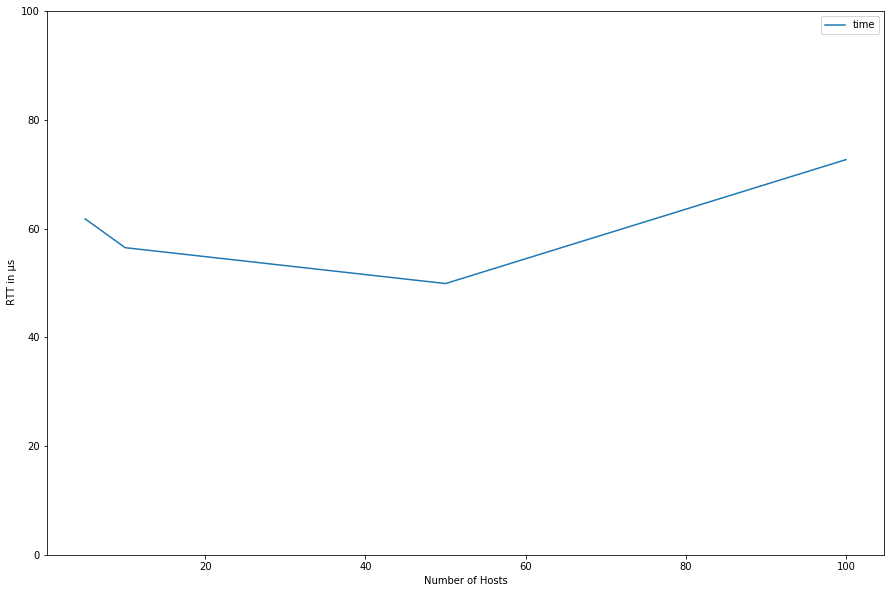

In [24]:
star0_wiw.plot.line(ylabel=" RTT in µs", xlabel="Number of Hosts", figsize=(15,10),ylim=(0,100))

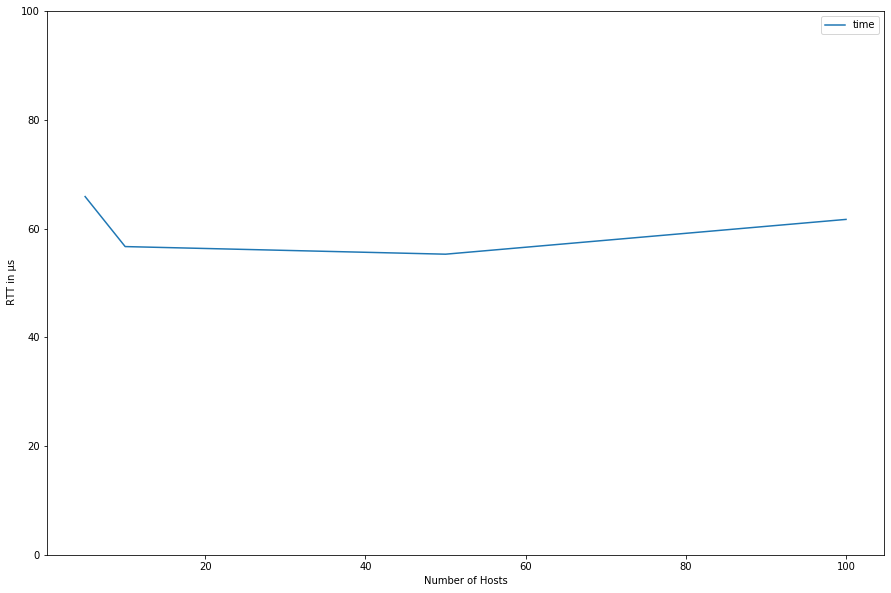

In [23]:
star2_wiw.plot.line(ylabel=" RTT in µs", xlabel="Number of Hosts", figsize=(15,10), ylim=(0,100))